 # Modern CNN Variants

# 📌EfficientNet 

## 🔹 Introduction
-  CNNs improve accuracy by scaling **depth**, **width**, or **resolution**.  
-  Traditional scaling is **manual and inefficient** (trial-and-error).  

## 🔹 What is EfficientNet?
-  A family of CNNs designed for **efficient scaling**.  
-  Uses **compound scaling** to balance depth, width, and resolution together.  
-  Baseline model found using **Neural Architecture Search (NAS)**.  

## 🔹 Compound Scaling
-  Scaling just one dimension gives limited improvement.  
-  Balanced scaling across all three (depth, width, resolution) is more effective.  
-  Controlled by a **compound coefficient (ϕ)** to fit available resources.  

## 🔹 Architecture Details
-  Based on **Mobile Inverted Bottleneck Convolution (MBConv)** blocks (from MobileNetV2).  
-  Optimized for both **accuracy and efficiency** (penalizes high FLOPS and latency).  

## 🔹 Performance & Results
-  State-of-the-art on ImageNet:  
  -  Top-1 accuracy ≈ **84.4%**  
  -  Top-5 accuracy ≈ **97.3%**  
-  On Flowers dataset: **98.8%** accuracy.  
-  On CIFAR-100: **91.7%** accuracy.  
-  EfficientNet models are:  
  - **8.4× smaller**  
  - **6.1× faster** than previous top CNNs.  

## 🔹 Explainability
-  Produces sharper and more **focused Class Activation Maps (CAMs)**.  
-  Improves interpretability by highlighting relevant object regions.  

## 🔹 Conclusions
-  **Balanced scaling** is better than naive single-axis scaling.  
-  The scaling approach is **generalizable** to other architectures.  
-  EfficientNet = **High accuracy + Low computational cost**.  
-  Useful for both research and practical applications.  

## ⭐ Key Takeaways
-  Scale depth, width, and resolution **together** for efficiency.  
-  Use **NAS** to design strong baseline models.  
-  EfficientNet = **Performance + Speed + Interpretability**.
   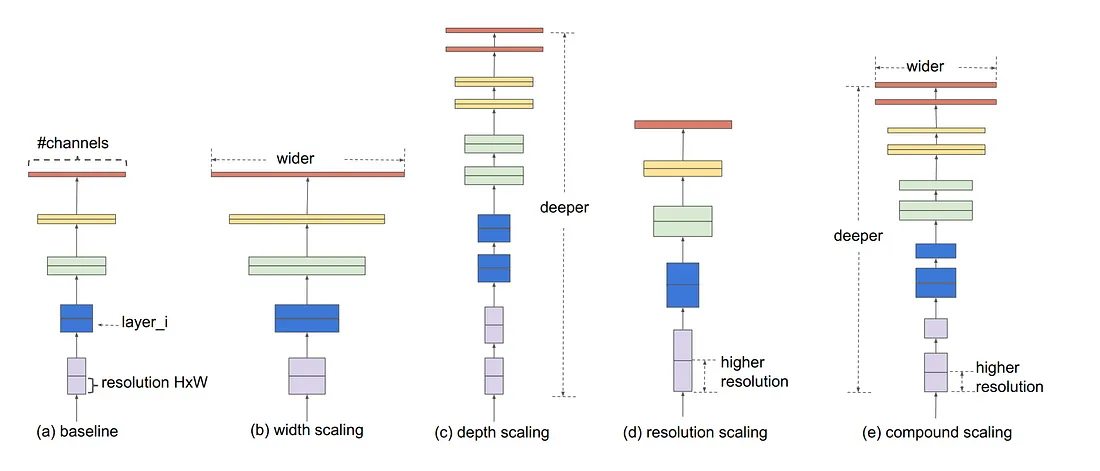


# 📌 MobileNet Architectures (v1, v2, v3)

## 🔹 MobileNet Family
-  Developed by **Google (2017)**.  
-  Designed for **mobile and resource-constrained devices**.  
-  Goal: **High speed + High performance**.  
-  Widely used in image classification, object detection, and segmentation.  
- Versions:
  - MobileNet v1 (2017)
  - MobileNet v2 (2018)
  - MobileNet v3 (2019)


## 🔹 MobileNet v1 (2017)
-  **10× faster and smaller** than VGG16.  
-  **Main contributions:**
  -  **Depthwise Separable Convolution** instead of standard convolution.  
  -  **ReLU6** activation (instead of ReLU).  
  -  Introduced **width & resolution multipliers** as hyperparameters.  

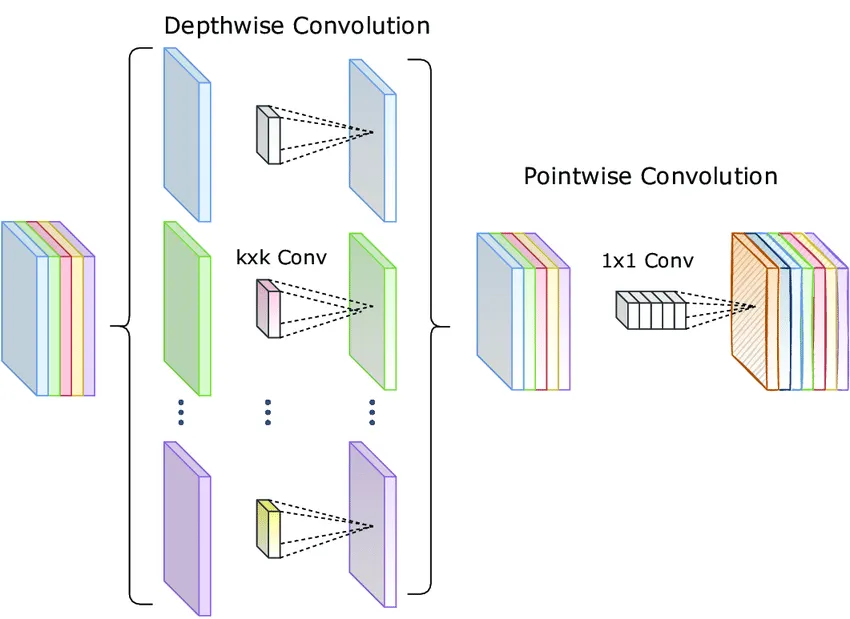

## 🔹 MobileNet v2 (2018)
-  **0.3× faster and smaller**, with **+1% higher accuracy** than v1.  
-  **Key improvements:**
  -  **Linear bottleneck** (instead of non-linear).  
  -  **Inverted residual block**.  
  -  **Expansion → Projection** pathway.  
  -  **Residual connections** as building blocks.  

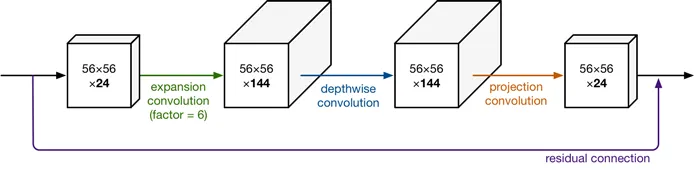

## 🔹 MobileNet v3 (2019)
-  **2× faster**, **30% smaller**, but **≈3% less accurate** than v2.  
-  **Main innovations:**
  -  **HardSwish** activation (instead of ReLU6).  
  -  **Squeeze-and-Excitation (SE) modules** for channel attention.  
  -  **MnasNet + NetAdapt** (automated search and adaptation).  
  -  **Redesigned expensive layers** for efficiency.  
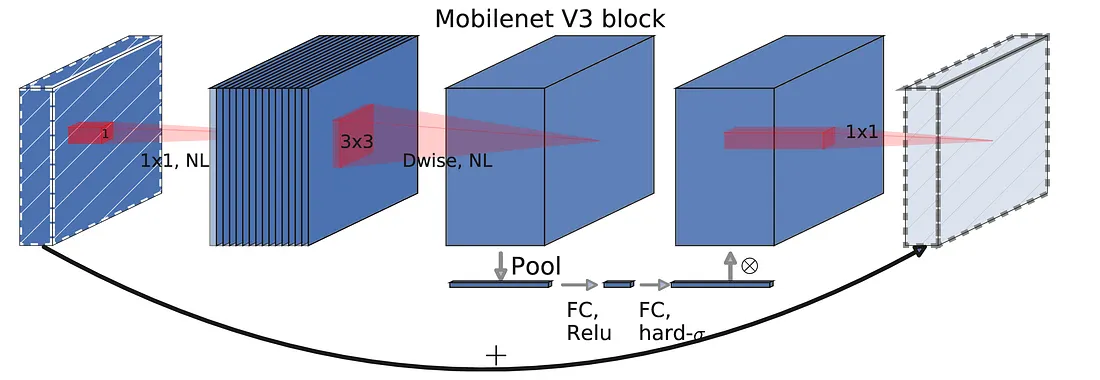

## 🔹 Conclusion
-  MobileNet family = **fast, lightweight CNNs** optimized for mobile devices.  
-  Native support in most ML frameworks (TensorFlow, PyTorch, etc.).  
-  Pretrained weights available for:
  - Image Classification  
  - Object Detection  
  - Semantic Segmentation  
-  Ideal for real-time and edge applications.  



## ⭐ Key Takeaways
- MobileNet v1 → Introduced **Depthwise Separable Convolutions**.  
- MobileNet v2 → Added **Linear Bottlenecks + Inverted Residuals**.  
- MobileNet v3 → Optimized further with **HardSwish + SE + NAS techniques**.  


#  📌ShuffleNet 


## 🔹 What is ShuffleNet?

- Developed by Megvii Inc (Face++). 
- Designed for **mobile devices** with very tight compute budgets (~10-150 MFLOPs).   
- Aims to reduce computational cost while keeping accuracy high (on ImageNet, COCO, etc.). 


## 🔹 Key Ideas / Architectural Innovations

- ✅ **Pointwise Group Convolution**: Instead of full-dense 1×1 convolutions, uses grouped ones to reduce computation. 
- ✅ **Channel Shuffle**: After group convolutions, shuffling the channels helps information flow across different groups. Without shuffle, groups get isolated. 
- ✅ **ShuffleNet Unit**: Combines pointwise group conv + channel shuffle; there are versions with stride 1 or 2; includes shortcut (skip) connections.  


## 🔹 Network Structure / Configurations

- 🛠️ The architecture is built by stacking many “ShuffleNet units” in **stages**. 
- 🎚️ Uses a *group number* (g) to decide how many groups in pointwise convolutions (trade-off: more groups = lower compute but possibly lower representation capacity) for each version. 
- 🔧 Scaling: The network can be scaled by a factor *s* on number of channels (i.e. “ShuffleNet s×”). Computation grows roughly with s².  


## 🔹 Experiments & Ablation Studies

- 🔍 **On group convolutions**: When g > 1, performance improves vs g = 1 (no group conv), but too many groups (e.g. g = 4 or 8) can degrade performance. 
- 🔄 **Channel shuffle effect**: Models with channel shuffle outperform matching ones *without* shuffle. Shuffle helps cross-group information.
- 📉 **Comparison vs MobileNet / others**: For similar computational complexity, ShuffleNet outperforms MobileNet (especially at low MFLOPs). E.g. for ~40 MFLOPs, ShuffleNet beats MobileNet by ~6.7%. 

## 🔹 Results & Speed

- ⚡ Actual inference speed tested on ARM mobile hardware: significant speedups vs older, more expensive networks (e.g. AlexNet). 
- 📉 Compute cost reduction: AlexNet ~720 MFLOPs vs ShuffleNet 1× ~140 MFLOPs, 0.5× ~40 MFLOPs. 


## 🔹 Advantages & Limitations

**Advantages:**

- High accuracy for low compute.  
- Good generalization: works well on object detection (MS COCO) too. {index=14}  
- Real-hardware speed gains.  

**Limitations:**

- Very small models (very low MFLOPs) may lose representation capacity.  
- More groups → thinner channels → possibly less ability to capture features.  


## 🔹 Conclusion

- ShuffleNet is a highly efficient CNN for mobile devices, especially when compute is very limited.  
- Using **pointwise group convolutions + channel shuffle** allows better trade-off between performance and computation.  
- Useful as a base architecture for mobile/edge deployments where latency / resource constraints matter.  


## ⭐ Key Takeaways

- Group convolutions + channel shuffle are powerful tools for reducing compute while preserving accuracy.  
- Structure (units/stages) and scaling (number of channels, group count) are important levers.  
- Always test actual device performance—not just theoretical MFLOPs / FLOPs.  


# Training Deep CNNs

# 📌  Data Augmentation

## 🔹 What is Data Augmentation?

- Data augmentation = artificially increasing the size and diversity of a training dataset by making modifications of existing data.  
- It differs from synthetic data generation:  
  - **Augmented data** rearranges or transforms existing data.  
  - **Synthetic data** creates new data points (sometimes by generation models). 
- Applicable not just to images, but also text, audio, video, etc. 


## 🔹 Why & When to Use It

- Helps prevent **overfitting** when the model memorizes training data too well.  
- Useful when the original training set is **small or imbalanced**.   
- Improves generalization and robustness by simulating variations the model might see in real-world data.  
- Can reduce labeling/collection cost since you reuse existing examples. 

## 🔹 Limitations & Challenges

- Existing **biases** in the original data get preserved or amplified. 
- Ensuring augmentation quality—too much distortion or unrealistic transforms can hurt performance. 
- Some augmentation techniques are computationally expensive or tricky to implement properly. 


## 🔹 Techniques of Data Augmentation

### 🎧 Audio

1. Noise injection (Gaussian or random)
2. Shifting (moving the audio signal forward/backward)  
3. Changing speed (time stretch) 
4. Changing pitch 


### ⚙️ Advanced Techniques

- Generative Adversarial Networks (GANs) to generate new realistic data.
- Neural Style Transfer (to transplant style characteristics)


## 🔹 Tools & Frameworks

- **Keras / TensorFlow**: augmentation layers, `tf.image`, `ImageDataGenerator` etc. 
- **PyTorch**: `torchvision.transforms` etc. 
- **Albumentations**: flexible and high performance for image augmentation.
- **Imgaug**, **Augmentor**, **OpenCV**: offer variety of augmentation techniques and more control.  

## ⭐ Key Takeaways

- Data augmentation is a simple yet powerful way to improve model generalization.  
- Always consider the original data’s characteristics: apply augmentations that make sense (don’t distort classes fundamentally).  
- Augmentation improves training especially when data is small / imbalanced.  

# 📌 Random Flipping in Data Augmentation


## 🔹 What is Random Flipping?

- Flipping = creating mirrored versions of existing images (horizontal or vertical) to increase dataset diversity. 
- It’s done **randomly** during training so the model sees a variety of orientations. 


## 🔹 Why Use It?

- Helps models **generalize better** by not over-fitting to specific object orientations. 
- For example, a horizontally flipped image of a cat is still a cat, but gives the model another way to see the features.  
- In object detection, flipping helps the model learn that direction (left/right) doesn’t define identity. 

## 🔹 Advantages

- ✔️ Very simple, low computation overhead. 
- ✔️ Doesn’t need extra storage because flipping is done *on the fly* during training. 


## 🔹 Things to Watch Out For / Limitations

- ⚠️ Context matters! For images with text, vertical flipping can distort meaning (e.g. street signs). 
- ⚠️ Medical imaging: flipping vertically might misrepresent anatomical orientation. 


## 🔹 How to Implement

- In **TensorFlow**:
  - Use functions like `tf.image.flip_left_right` or `tf.image.flip_up_down` wrapped in a random condition.  
- In **PyTorch**:
  - Use `transforms.RandomHorizontalFlip()` from `torchvision.transforms`.  
- You can set a probability for the flip (e.g. 50%) so only some images are flipped. 
- Combine flipping with other augmentation techniques (rotations, cropping, etc.) to get more variation. 2}  


## ⭐ Key Takeaways

- Random flipping is a **cheap but effective** augmentation method.  
- Always consider whether flipping (especially vertical flips) is appropriate for your specific domain.  
- Use it with other augmentations and randomization for best results.  


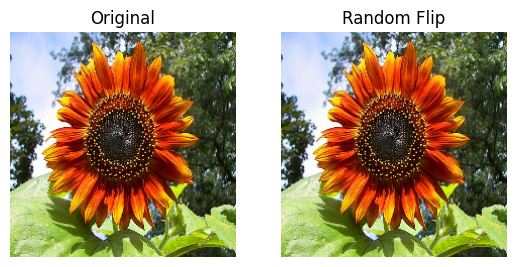

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load a sample image from TensorFlow datasets (flower photo)
img = tf.keras.utils.get_file(
    "flower.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
)
img = tf.io.read_file(img)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (224, 224))

# Random flip layer
flip_layer = tf.keras.layers.RandomFlip("horizontal")
flipped_img = flip_layer(tf.expand_dims(img, 0))[0]

# Show original vs flipped
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(tf.cast(img/255.0, tf.float32))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Random Flip")
plt.imshow(tf.cast(flipped_img/255.0, tf.float32))
plt.axis("off")

plt.show()

# 🌻 Explanation  Flipping Code in TensorFlow


## 1. Importing Libraries
- **TensorFlow (`tf`)** is used for image processing and applying data augmentation.
- **Matplotlib (`plt`)** is used to display the original and augmented images.


## 2. Loading the Sample Image
- The code downloads a sunflower image from TensorFlow's dataset repository.
- The image is saved locally as `flower.jpg` for further processing.


## 3. Reading and Preprocessing the Image
- `tf.io.read_file()` reads the image file into memory.
- `tf.image.decode_jpeg(..., channels=3)` converts the JPEG image into an RGB image tensor.
- `tf.image.resize(..., (224, 224))` resizes the image to 224×224 pixels, which is a standard input size for most CNNs.
                                                                                                        
## 4. Applying Random Horizontal Flip
- A **Random Flip layer** is created using `tf.keras.layers.RandomFlip("horizontal")`.
- The image is randomly flipped horizontally with a 50% probability.
- `tf.expand_dims(img, 0)` adds a batch dimension required by Keras layers.
- `[0]` removes the batch dimension to get the single augmented image back.

    
## 5. Displaying the Images
- Matplotlib shows the **original image** on the left and the **flipped image** on the right.
- Pixel values are scaled from `[0, 255]` to `[0, 1]` for proper visualization.
- This visual comparison helps see the effect of random flipping.



# 🧩 Random Crop Data Augmentation


## 🔍 What Is Random Crop?

- **Definition**: Random crop is a data augmentation technique where a random subset of an original image is extracted.
- **Purpose**: Helps models generalize better by simulating partial views of objects, which are common in real-world scenarios.
- **Example**: In object detection, objects might not always be fully visible or at the same scale. Random cropping introduces variability, aiding the model's robustness.


## 🚀 Why Use Random Crop?

- **Simulates Real-World Variability**: Objects may appear at different scales or be partially obscured in real-life applications.
- **Enhances Model Generalization**: Exposes the model to various portions of images, preventing overfitting to specific regions.
- **Improves Performance**: Particularly beneficial in tasks like object detection and classification, where object positioning varies.

## 🛠️ Implementing Random Crop

### Basic Classification Scenario

- **Objective**: Create a random subset of an image.
- **Steps**:
  1. Define the desired output size.
  2. Determine random coordinates within the original image.
  3. Extract the cropped region.

### Object Detection Considerations

- **Challenge**: Ensure that bounding boxes remain valid after cropping.
- **Approach**:
  - **Fully Inside**: Keep annotations entirely within the cropped region.
  - **Partially Inside**: Adjust bounding boxes to fit within the new crop.
  - **Outside**: Discard annotations that fall outside the cropped area.

## 📦 Practical Example

- **Scenario**: Detecting raccoons in a yard.
- **Challenge**: Raccoons may be partially visible or at varying distances.
- **Solution**: Apply random cropping to simulate different viewpoints and occlusions.
  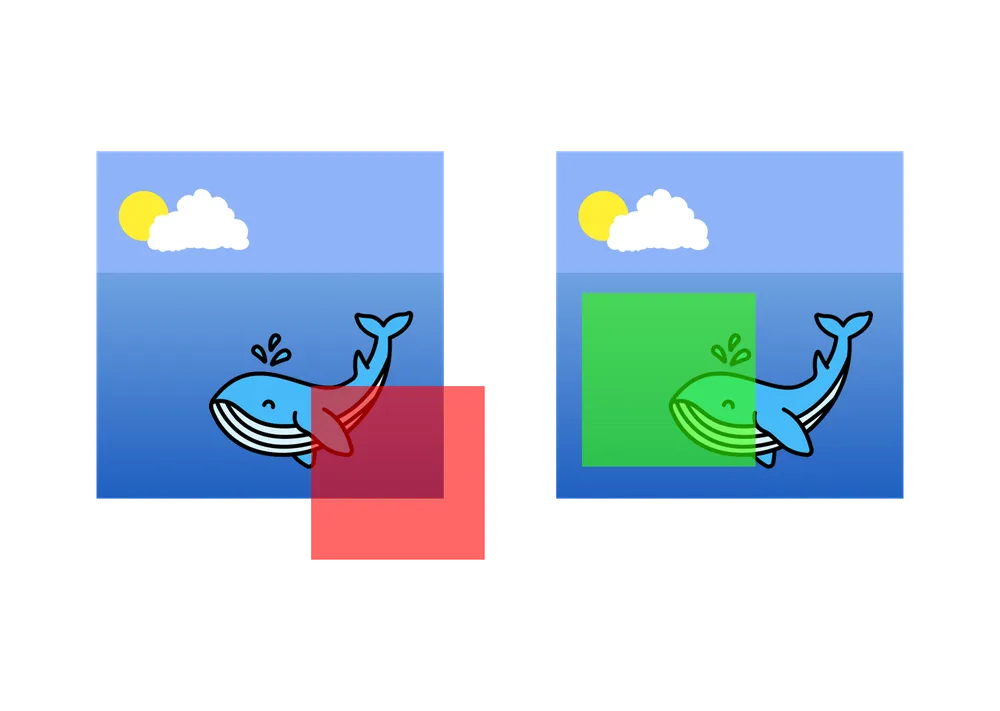

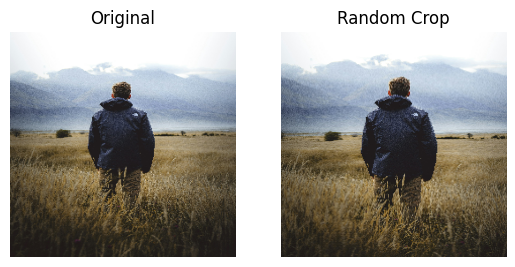

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load sample image from a direct URL
img_path = tf.keras.utils.get_file(
    "sunflower.jpg",
    "https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d"
)
img = tf.io.read_file(img_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (256, 256))

# Define random crop size
crop_size = (224, 224)

# Apply random crop
cropped_img = tf.image.random_crop(img, size=(crop_size[0], crop_size[1], 3))

# Display original vs cropped
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(tf.cast(img/255.0, tf.float32))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Random Crop")
plt.imshow(tf.cast(cropped_img/255.0, tf.float32))
plt.axis("off")

plt.show()


## 🧩 Explanation of Random Crop Code

## 1. Loading the Image
- The code loads a **sample image** either from a URL or local file.  
- The image is decoded into a format suitable for processing (`RGB`) and resized to a standard size (e.g., 256×256 pixels) to make it easier to apply cropping.


## 2. Defining Crop Size
- A **crop size** is specified, for example `(224, 224)`.  
- This defines the dimensions of the random cropped region that will be extracted from the original image.


## 3. Applying Random Crop
- The image is cropped **randomly** using either TensorFlow (`tf.image.random_crop`) or PyTorch (`transforms.RandomCrop`).  
- Random cropping selects a **random starting point** within the image and extracts a region of the specified size.  
- This ensures that every time the code runs, a slightly different portion of the image is used.


## 4. Visualization
- Matplotlib is used to display images side by side:  
  - **Original Image** → shows the full, resized image.  
  - **Randomly Cropped Image** → shows the randomly selected portion of the original image.  
- This visual comparison helps understand how random cropping modifies the image for data augmentation.


# 🎨 Color Jitter Augmentation


## 🔍 What Is Color Jitter?

- **Definition**: Color Jitter is a data augmentation technique that introduces random variations in an image's brightness, contrast, hue, and saturation.
- **Purpose**: Enhances model robustness by simulating real-world lighting and color variations, helping the model generalize better.


## ⚙️ Parameters of Color Jitter

Each parameter controls a specific aspect of color variation:

- **Brightness**: Adjusts the lightness or darkness of the image.
- **Contrast**: Alters the difference between the lightest and darkest areas.
- **Saturation**: Changes the intensity of colors.
- **Hue**: Modifies the overall color tone.
- **Probability (`p`)**: Determines the likelihood of applying the transformation.

*Note*: Parameter values typically range from 0.0 to 1.0, where 0.0 means no change and 1.0 represents maximum variation.


## 🖼️ Visual Impact of Color Jitter

Applying Color Jitter can result in images with:

- **Varying brightness**: Images may appear lighter or darker.
- **Altered contrast**: Differences between light and dark areas become more or less pronounced.
- **Changed saturation**: Colors may become more vivid or muted.
- **Modified hue**: Overall color tone shifts, affecting the image's appearance.
  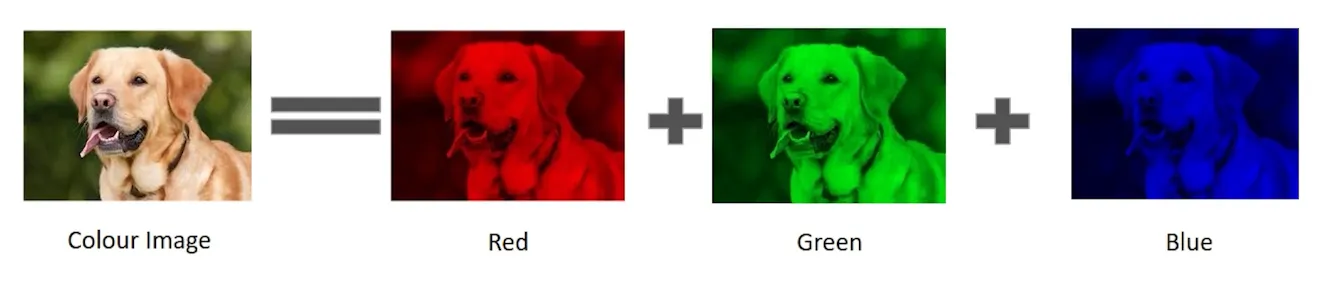

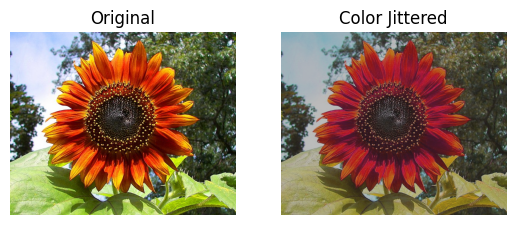

In [3]:
import torch
from torchvision import transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load sample image
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# Define Color Jitter transform
color_jitter = transforms.ColorJitter(
    brightness=0.3,   # change brightness by ±30%
    contrast=0.3,     # change contrast by ±30%
    saturation=0.3,   # change saturation by ±30%
    hue=0.1           # change hue by ±0.1
)

# Apply the transformation
augmented_img = color_jitter(img)

# Display original vs augmented
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Color Jittered")
plt.imshow(augmented_img)
plt.axis("off")

plt.show()

## 🎨 Explanation of Color Jitter Augmentation Code


## 1. Loading the Image
- The code loads a sample image either from a **URL** or a **local file**.  
- The image is converted to **RGB** format to ensure consistency for color adjustments.  


## 2. Defining the Color Jitter Transformation
- **Color Jitter** randomly changes the following properties of the image:
  - **Brightness**: Makes the image lighter or darker.
  - **Contrast**: Increases or decreases the difference between light and dark regions.
  - **Saturation**: Makes the colors more or less vivid.
  - **Hue**: Shifts the overall color tone of the image.
- Each property is defined with a range (e.g., ±30% for brightness, ±0.1 for hue), controlling the degree of random variation.  
- A **probability parameter (`p`)** can also be set to determine how often the transformation is applied.


## 3. Applying the Transformation
- The Color Jitter transformation is applied to the image, producing a **new augmented image** with randomized color variations.  
- Every time the code is run, the output can slightly differ due to the random nature of the augmentation.


## 4. Visualization
- Matplotlib is used to display the **original image** and the **color-jittered image** side by side.  
- This helps to **see the effect** of the augmentation, such as changes in brightness, contrast, saturation, or hue.


## ⭐ Key Takeaways
- **Purpose**: Color Jitter helps simulate real-world lighting and color variations, improving the model’s ability to generalize.  
- **Usage**: Commonly used in image classification, object detection, and segmentation tasks.  
- **Effectiveness**: Increases dataset diversity without adding new images and enhances robustness to changes in color or lighting conditions.

# 🧩 CutMix: A Novel Data Augmentation Technique


## 📌 What Is CutMix?

- **Definition**: CutMix is a data augmentation strategy that enhances model generalization by combining two images and their corresponding labels.
- **Mechanism**: It involves:
  - Cutting a random patch from one image.
  - Pasting this patch onto another image.
  - Mixing the labels of both images based on the area of the patch.


## 🔍 Motivation Behind CutMix

- **Limitations of Previous Techniques**:
  - **Regional Dropout (e.g., Cutout)**: Involves removing parts of an image, which can lead to loss of important information.
  - **Mixup**: Combines images and labels linearly, which may not be suitable for tasks requiring precise localization.

- **CutMix Advantage**:
  - Retains informative pixels from both images.
  - Encourages the model to focus on less discriminative parts of objects.
  - Particularly beneficial for tasks like object detection and localization.


## 🛠️ How Does CutMix Work?

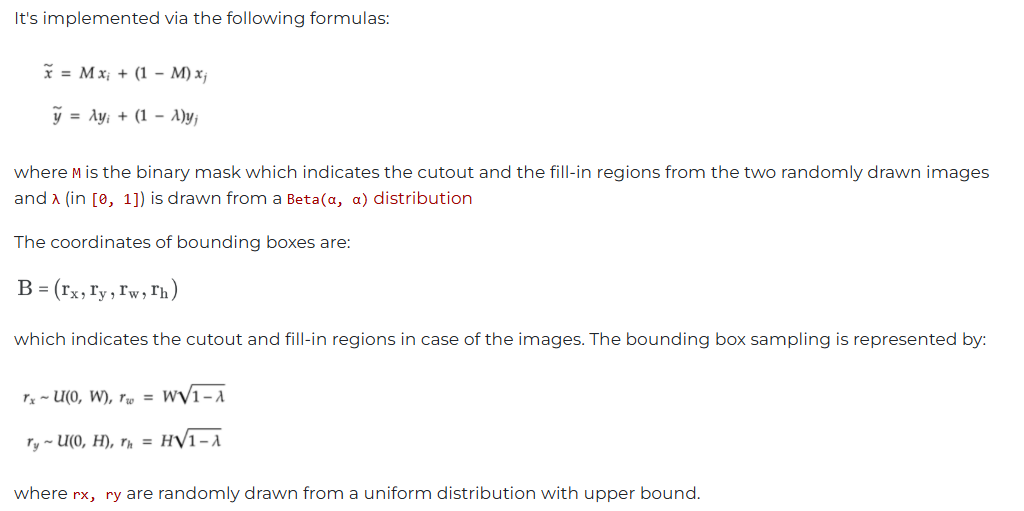

## 🖼️ Visualizing the Effect of CutMix

- **Class Activation Maps (CAMs)**:
  - **CutMix**: The model utilizes the entire image, focusing on both the original and inserted regions.
  - **Mixup**: The model may become confused, focusing on blended areas.
  - **Cutout**: The model focuses on remaining parts but may miss context.


## 📊 Performance Impact

- **ImageNet Classification**: CutMix improves performance over baseline models.
- **Object Detection**: Unlike Mixup and Cutout, CutMix enhances accuracy in localization tasks.

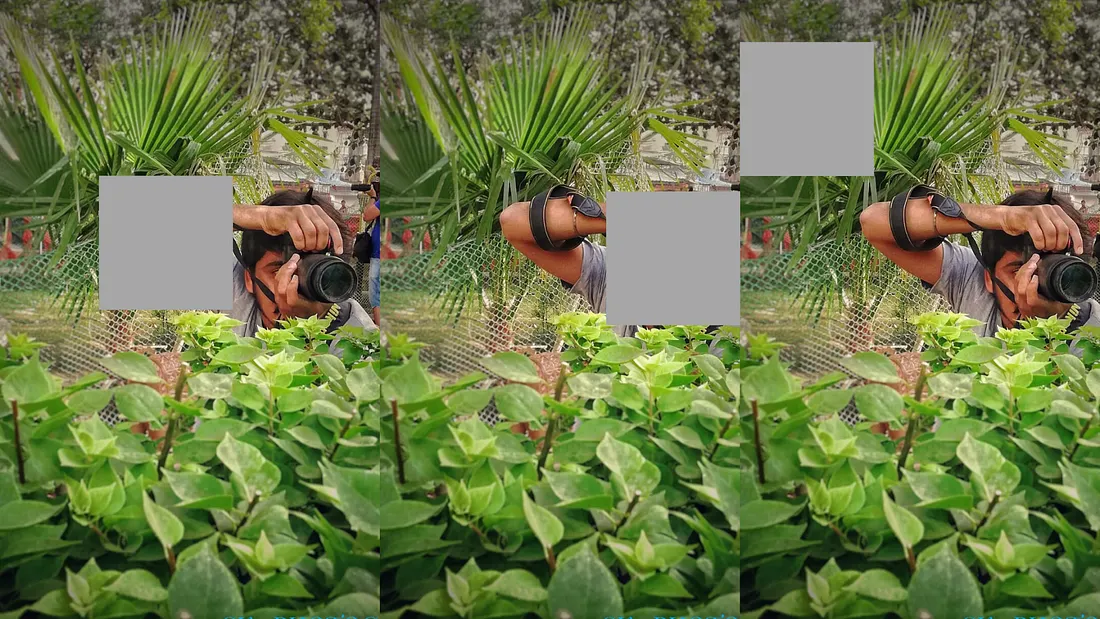
## ✅ Conclusion

- **CutMix** offers a balanced approach by combining the strengths of previous techniques.
- It is particularly effective for tasks requiring precise localization and generalization.

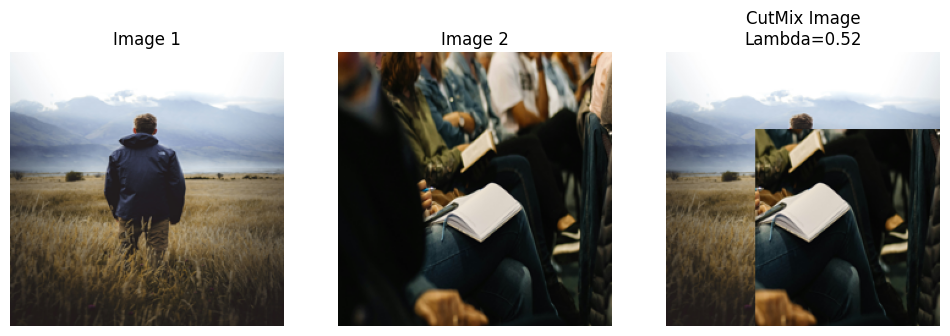

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Function to load image safely
def load_image(url, size=(224, 224)):
    response = requests.get(url)
    if response.status_code != 200:
        raise ValueError(f"Failed to load image from {url}")
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img = img.resize(size)
    return np.array(img)

# ✅ Working public image URLs (open to everyone)
url1 = "https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d"  # Sunflower
url2 = "https://images.unsplash.com/photo-1529070538774-1843cb3265df"  # Tulip

# Load images
img1 = load_image(url1)
img2 = load_image(url2)

# CutMix function
def cutmix(img1, img2, alpha=1.0):
    lam = np.random.beta(alpha, alpha)
    H, W, _ = img1.shape
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)

    cx = np.random.randint(W)
    cy = np.random.randint(H)

    x1 = np.clip(cx - cut_w // 2, 0, W)
    y1 = np.clip(cy - cut_h // 2, 0, H)
    x2 = np.clip(cx + cut_w // 2, 0, W)
    y2 = np.clip(cy + cut_h // 2, 0, H)

    new_img = img1.copy()
    new_img[y1:y2, x1:x2, :] = img2[y1:y2, x1:x2, :]

    lam = 1 - ((x2 - x1) * (y2 - y1) / (W * H))
    return new_img, lam

# Apply CutMix
cutmix_img, lam = cutmix(img1, img2)

# Display results
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Image 1")
plt.imshow(img1)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Image 2")
plt.imshow(img2)
plt.axis("off")

plt.subplot(1,3,3)
plt.title(f"CutMix Image\nLambda={lam:.2f}")
plt.imshow(cutmix_img)
plt.axis("off")

plt.show()

# 🖼 CutMix Data Augmentation in Python


## 1️⃣ Image Loading

- Two images are loaded from **public URLs** using a custom `load_image()` function.
- The function:
  - Sends a GET request to the URL.
  - Checks for successful response.
  - Opens the image using PIL and converts it to **RGB**.
  - Resizes it to a fixed size `(224, 224)`.
- This ensures that the images are ready for augmentation and have the same dimensions.

## 2️⃣ CutMix Function

CutMix is an augmentation technique that **combines two images** by cutting a patch from one image and pasting it onto another. This also mixes the labels proportionally.

### Steps in the function:

1. **Sample a mixing ratio `lam`** from a Beta distribution (`alpha` parameter controls the strength of mixing).  
2. **Determine patch size**:
   - Compute `cut_rat = sqrt(1 - lam)`.
   - Patch width = `W * cut_rat`, height = `H * cut_rat`.
3. **Random patch location**:
   - Choose a random center `(cx, cy)` for the patch.
   - Compute bounding box coordinates `(x1, y1, x2, y2)` with clipping to stay within image boundaries.
4. **Apply CutMix**:
   - Copy `img1` to `new_img`.
   - Replace the patch area in `new_img` with the corresponding area from `img2`.
5. **Adjust lambda**:
   - Recalculate `lam` based on the actual area of the patch to maintain label proportions.

    
## 3️⃣ Applying CutMix

- The `cutmix()` function is applied to the two loaded images.
- Returns:
  - `cutmix_img`: the resulting augmented image.
  - `lam`: the effective mixing ratio.


## 4️⃣ Visualization

- **Matplotlib** is used to display:
  1. Original Image 1
  2. Original Image 2
  3. CutMix Image with the `lambda` value displayed in the title.
- This visually demonstrates how CutMix blends two images.


## 5️⃣ Key Points

- CutMix helps improve **model generalization** by creating new training examples.
- Works well for **image classification tasks**.
- Can be combined with other augmentations like flips, rotations, and color jitter.
- Using **NumPy + PIL** provides flexibility to work with any image source.
- `lambda` is important for **mixing labels** when training deep learning models.

# 📚 MixUp Data Augmentation

## What is MixUp?

- **MixUp** is a data augmentation technique that synthesizes new training samples by linearly combining pairs of images and their corresponding labels.
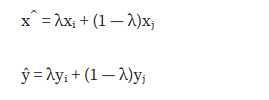

## Key Benefits

- **Improved Generalization**: Enhances model robustness by encouraging smoother decision boundaries.
- **Regularization**: Acts as a form of regularization, reducing overfitting, especially in small datasets.
- **Noise Resilience**: Increases model tolerance to label noise and adversarial examples.
- **Compatibility**: Easily integrates with existing training pipelines and supports both image and text data.

##  Benefits of MixUp

- **Improved Generalization**: Reduces overfitting by creating intermediate samples.
- **Regularization**: Acts as a form of regularization without modifying the model.
- **Noise Robustness**: Makes the model more tolerant to label noise.
- **Easy Integration**: Can be applied to batches of data in training loops or in `tf.data.Dataset` pipelines.

## Considerations

- **Soft Labels**: Requires the loss function (e.g., categorical cross-entropy) to handle soft labels.
- **Blurring of Images**: Since images are linearly combined, fine details may be blurred.
- **Alpha Tuning**: The Beta distribution parameter \(\alpha\) controls how much mixing occurs; common values range from 0.1 to 0.4.


##  Use Cases

- **Image Classification**: Particularly beneficial for small or medium-sized datasets.
- **Transfer Learning**: Can improve fine-tuning on pre-trained models.
- **Semi-Supervised Learning**: Useful when some labels are uncertain or noisy.

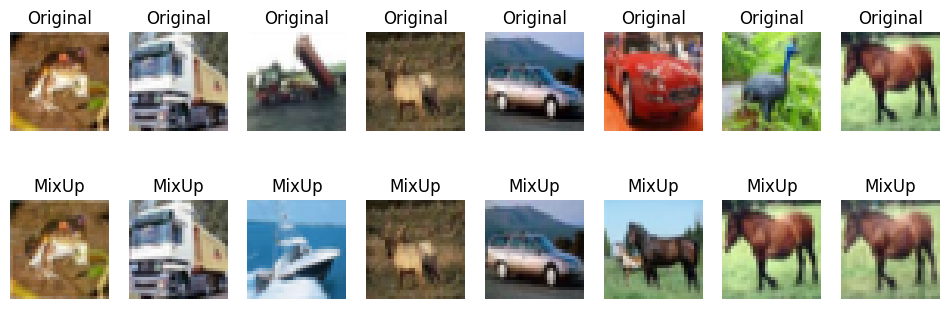

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Sample images from TensorFlow Datasets (faster)
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
x_train = x_train[:16].astype("float32") / 255.0  # only 16 images
y_train = tf.keras.utils.to_categorical(y_train[:16], 10)


# MixUp Function
def mixup(batch_x, batch_y, alpha=0.2):
    batch_size = tf.shape(batch_x)[0]
    lam = np.random.beta(alpha, alpha, batch_size)
    lam_x = lam.reshape(batch_size, 1, 1, 1)
    lam_y = lam.reshape(batch_size, 1)
    index = tf.random.shuffle(tf.range(batch_size))
    mixed_x = lam_x * batch_x + (1 - lam_x) * tf.gather(batch_x, index)
    mixed_y = lam_y * batch_y + (1 - lam_y) * tf.gather(batch_y, index)
    return mixed_x, mixed_y

# Apply MixUp
mixed_x, mixed_y = mixup(x_train, y_train)

# Display Original vs MixUp

plt.figure(figsize=(12,4))
for i in range(8):
    plt.subplot(2,8,i+1)
    plt.imshow(x_train[i])
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(2,8,i+9)
    plt.imshow(mixed_x[i])
    plt.title("MixUp")
    plt.axis("off")
plt.show()

# 📚 MixUp Data Augmentation Example: Explanation

## 1️⃣ Loading Sample Images
- The code loads **16 images** from the CIFAR-10 dataset for demonstration purposes.
- Images are **normalized** to the range `[0, 1]` by dividing pixel values by 255.
- Labels are converted to **one-hot encoding** since MixUp works on soft labels.


## 2️⃣ MixUp Function

- The `mixup` function takes a batch of images and their labels and returns **augmented images and labels**.
- Steps inside the function:
  1. **Sample λ (lambda)** from a Beta distribution with parameter `alpha`.  
     - Determines the mixing ratio between two images.
  2. **Reshape λ** for broadcasting:
     - `lam_x` for image dimensions `(batch_size, H, W, C)`.
     - `lam_y` for labels `(batch_size, num_classes)`.

## 3️⃣ Applying MixUp

- A small batch of 16 images and labels is passed to the `mixup` function.
- The function outputs `mixed_x` (augmented images) and `mixed_y` (mixed labels).
- This simulates MixUp augmentation for training.


## 4️⃣ Visualization

- **Matplotlib** is used to display the results.
- The first row shows the **original images**.
- The second row shows the **MixUp images**.
- Each MixUp image is a **linear combination of two images** from the batch.
- This visual comparison helps understand how MixUp blends images and labels.


# Regularization 

# 📌 Dropout

## What is Dropout?
Dropout is a regularization technique in which **random neurons in a layer are temporarily “dropped” or ignored** during training. These neurons do not participate in forward or backward passes for that iteration.

## Where is it used?
- Commonly applied in **fully connected (dense) layers** of neural networks.
- Can also be used in **convolutional layers** with a lower probability.
- Only active during **training**, not during inference.

## Why use Dropout?
- Prevents the network from **overfitting** to the training data.
- Encourages the network to **learn redundant and robust features** rather than relying on specific neurons.
- Simulates training **many smaller networks simultaneously**, improving generalization.

# 📌 Batch Normalization (BatchNorm)

## What is BatchNorm?
Batch Normalization normalizes the inputs to a layer so that they have **zero mean and unit variance**. It reduces the internal covariate shift, stabilizing the training process.

## Where is it used?
- Usually applied **after a convolution or dense layer** and before the activation function.
- Used in most modern architectures such as **ResNet, VGG, and EfficientNet**.

## Why use BatchNorm?
- Speeds up training by allowing **higher learning rates**.
- Acts as a **regularizer**, sometimes reducing the need for dropout.
- Improves model **stability and convergence**.
- Reduces sensitivity to **weight initialization**.


# 📌 Weight Decay (L2 Regularization)

## What is Weight Decay?
Weight Decay, also known as L2 Regularization, adds a **penalty proportional to the square of the weights** to the loss function. This discourages the model from learning excessively large weights.

## Where is it used?
- Applied to **all trainable parameters** in the network.
- Often used in **fully connected and convolutional layers**.
- Integrated into optimizers like **Adam, SGD**, etc., using a `weight_decay` or `kernel_regularizer` parameter.

## Why use Weight Decay?
- Prevents the network from **overfitting** by limiting weight magnitude.
- Encourages the model to **learn simpler and smoother functions**.
- Improves generalization performance on **unseen data**.


Epoch 1/5
50/50 - 3s - 66ms/step - accuracy: 0.2212 - loss: 2.4673 - val_accuracy: 0.1550 - val_loss: 2.3271
Epoch 2/5
50/50 - 1s - 16ms/step - accuracy: 0.3363 - loss: 1.9716 - val_accuracy: 0.1300 - val_loss: 2.4160
Epoch 3/5
50/50 - 1s - 16ms/step - accuracy: 0.3575 - loss: 1.8055 - val_accuracy: 0.1275 - val_loss: 2.6301
Epoch 4/5
50/50 - 1s - 15ms/step - accuracy: 0.4112 - loss: 1.6939 - val_accuracy: 0.1450 - val_loss: 2.6754
Epoch 5/5
50/50 - 1s - 16ms/step - accuracy: 0.4331 - loss: 1.5967 - val_accuracy: 0.1875 - val_loss: 2.5759


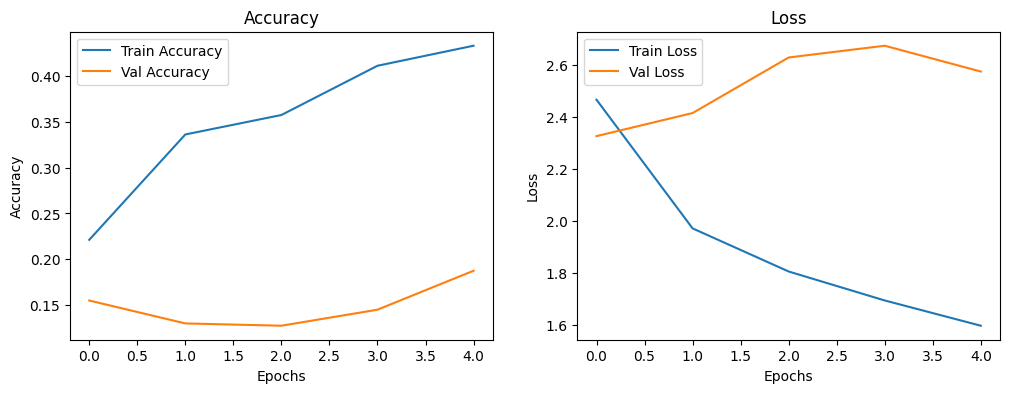

In [6]:
# -----------------------------
# Import Libraries
# -----------------------------
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# -----------------------------
# Load a subset of CIFAR-10 Dataset
# -----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Use only first 2000 images to reduce training time
x_train = x_train[:2000].astype("float32") / 255.0
y_train = tf.keras.utils.to_categorical(y_train[:2000], 10)
x_test = x_test[:500].astype("float32") / 255.0
y_test = tf.keras.utils.to_categorical(y_test[:500], 10)

# -----------------------------
# Build Smaller CNN with Regularization
# -----------------------------
weight_decay = 1e-4

model = models.Sequential([
    layers.Input(shape=(32,32,3)),

    # First Conv Block
    layers.Conv2D(16, (3,3), padding='same', activation=None,
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # Second Conv Block
    layers.Conv2D(32, (3,3), padding='same', activation=None,
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation=None, kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# -----------------------------
# Compile Model
# -----------------------------
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -----------------------------
# Train Model (faster)
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=5,         # reduced epochs
    batch_size=32,    # smaller batch
    validation_split=0.2,
    verbose=2
)

# -----------------------------
# Plot Training History
# -----------------------------
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ⚡ Optimizers in Deep Learning

## 🤔 What is an Optimizer?

An optimizer is an algorithm or method used to minimize an error function (loss function) or to maximize the efficiency of production. Optimizers guide how to adjust a model's learnable parameters (weights and biases) to reduce losses during training. 

## 🛠️ Types of Optimizers

### 1. Gradient Descent 📉

Gradient Descent tweaks parameters iteratively to minimize a given function by moving in the direction opposite to the steepest ascent. It uses the entire dataset for each update, which can be computationally heavy. 

### 2. Stochastic Gradient Descent (SGD) 🎲

SGD updates model parameters one by one. While it requires less memory and can handle large datasets, the frequent updates can create noisy gradients, causing the error to fluctuate. 

### 3. Mini-Batch Gradient Descent 🧩

This splits the training dataset into small batches and updates parameters per batch. It balances SGD's flexibility with batch gradient descent efficiency, leading to more stable convergence. 

### 4. SGD with Momentum 🚀

Momentum adds inertia to SGD updates, helping retain the direction of previous updates. This accelerates learning, stabilizes convergence, and helps escape local minima. 

### 5. AdaGrad (Adaptive Gradient Descent) 🎯

AdaGrad adapts the learning rate for each parameter based on past gradients. Parameters with higher gradients receive smaller updates, and lower gradients receive larger updates. Useful for sparse data! 

## ⚡ Learning Rate

The learning rate determines the size of the steps the optimizer takes towards the minimum. Too small → slow training 🐢, too large → may diverge or converge poorly.

## ✅ Conclusion

Choosing the right optimizer is crucial for effectively training deep learning models. Each has its strengths and trade-offs, depending on the problem, dataset, and available resources.  

# 🧠 Stochastic Gradient Descent (SGD) in Machine Learning

## 📘 Overview

Stochastic Gradient Descent (SGD) is an optimization algorithm used to minimize a loss function by adjusting the model's parameters. Unlike traditional gradient descent, which computes gradients using the entire dataset, SGD updates parameters using a single data point (or a small subset) at each iteration. This approach makes SGD particularly efficient for large datasets and online learning scenarios.

## 🔍 Understanding Gradient Descent

Gradient Descent is an iterative optimization algorithm used to minimize a loss function, which represents how far the model’s predictions are from the actual values. The main goal is to adjust the parameters of a model (weights, biases, etc.) so that the error is minimized.

The update rule for the traditional gradient descent algorithm is:

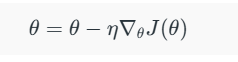

Where:
- theta represents the parameters of the model.
- eta is the learning rate.
- nabla_\theta Jtheta is the gradient of the loss function with respect to the parameters.

## ⚡ Need for Stochastic Gradient Descent

For large datasets, computing the gradient using all data points can be slow and memory-intensive. This is where SGD comes into play. Instead of using the full dataset to compute the gradient at each step, SGD uses only one random data point (or a small batch of data points) at each iteration. This makes the computation much faster and more scalable.

## 🔄 Working of Stochastic Gradient Descent

In Stochastic Gradient Descent, the gradient is calculated for each training example (or a small subset of training examples) rather than the entire dataset. The update rule becomes:

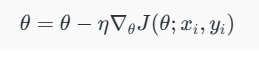

Where:
- xi and yi) represent the features and target of the i-th training example.
- nabla_theta theta; xi, yi is the gradient of the loss function with respect to the parameters, calculated for a single data point or a small batch.


In [7]:
import numpy as np

# Generate some simple linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add bias term (for intercept)
X_b = np.c_[np.ones((100, 1)), X]  # shape: (100, 2)

# Initialize parameters
theta = np.random.randn(2, 1)  # random initial weights

# Hyperparameters
learning_rate = 0.01
n_epochs = 10

# SGD algorithm
m = len(X_b)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradient

print("Final parameters (theta):")
print(theta)


Final parameters (theta):
[[4.25573545]
 [2.72608246]]


# 🧠 Adam Optimizer in Deep Learning

## 📘 What is Adam?

Adam (short for Adaptive Moment Estimation) is an optimization algorithm that combines the advantages of two other extensions of stochastic gradient descent: **Momentum** and **RMSprop**. It computes adaptive learning rates for each parameter by considering both the first and second moments of the gradients. Adam is particularly well-suited for large datasets and complex models due to its efficiency and low memory requirements.

## 🔍 How Does Adam Work?

Adam builds upon two key concepts in optimization:

### 1. Momentum

Momentum helps accelerate gradient descent by incorporating an exponentially weighted moving average of past gradients. This smooths out the trajectory of the optimization, allowing the algorithm to converge faster by reducing oscillations.

The update rule with momentum is:

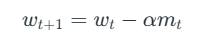

Where:
-  mt  is the moving average of the gradients at time  t 
-  alpha  is the learning rate
-  wt and wt+1 are the weights at time t and t+1 , respectively

The momentum term m_t is updated recursively as:

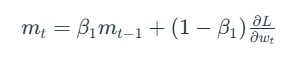
Where:
- beta_1 is the momentum parameter (typically set to 0.9)
- frac{\partial L}{\partial w_t} \) is the gradient of the loss function with respect to the weights at time t 

### 2. RMSprop (Root Mean Square Propagation)

RMSprop is an adaptive learning rate method that improves upon AdaGrad. While AdaGrad accumulates squared gradients, RMSprop uses an exponentially weighted moving average of squared gradients, which helps overcome the problem of diminishing learning rates.

The update rule for RMSprop is:

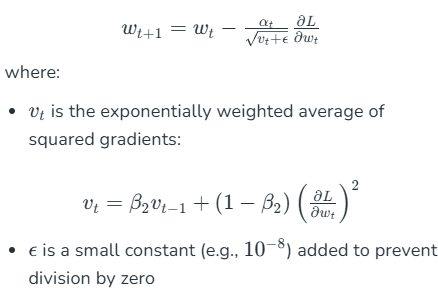

## 🛠️ Combining Momentum and RMSprop to Form Adam Optimizer

Adam combines the momentum and RMSprop techniques to provide a more balanced and efficient optimization process. The key equations governing Adam are as follows:

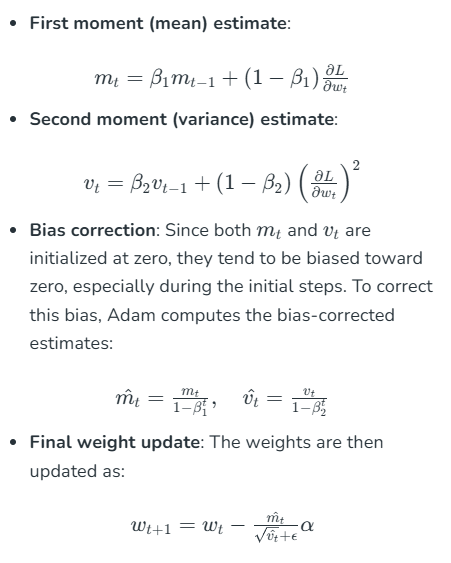


## ✅ Why Adam Works So Well

Adam addresses several challenges of gradient descent optimization:

- **Dynamic learning rates**: Each parameter has its own adaptive learning rate based on past gradients and their magnitudes. This helps the optimizer avoid oscillations and get past local minima more effectively.
- **Bias correction**: By adjusting for the initial bias when the first and second moment estimates are close to zero, Adam helps prevent early-stage instability.
- **Efficient performance**: Adam typically requires fewer hyperparameter tuning adjustments compared to other optimization algorithms like SGD, making it a more convenient choice for most problems.

## 📊 Performance of Adam

In comparison to other optimizers like SGD (Stochastic Gradient Descent) and momentum-based SGD, Adam outperforms them significantly in terms of both training time and convergence accuracy. Its ability to adjust the learning rate per parameter, combined with the bias-correction mechanism, leads to faster convergence and more stable optimization. 

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Create some simple synthetic data: y = 2x + 3 + noise
torch.manual_seed(42)
X = torch.randn(100, 1)
y = 2 * X + 3 + 0.1 * torch.randn(100, 1)

# Define a simple linear regression model
model = nn.Linear(1, 1)

# Define Mean Squared Error loss
criterion = nn.MSELoss()

# Define Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    optimizer.zero_grad()  
    loss.backward()        
    optimizer.step()       
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}")

# Print final parameters
print("Learned parameters:")
print(f"Weight: {model.weight.item():.4f}, Bias: {model.bias.item():.4f}")


Epoch [10/100], Loss: 6.6366
Epoch [20/100], Loss: 5.9316
Epoch [30/100], Loss: 5.2789
Epoch [40/100], Loss: 4.6801
Epoch [50/100], Loss: 4.1346
Epoch [60/100], Loss: 3.6405
Epoch [70/100], Loss: 3.1951
Epoch [80/100], Loss: 2.7952
Epoch [90/100], Loss: 2.4377
Epoch [100/100], Loss: 2.1194
Learned parameters:
Weight: 1.3483, Bias: 1.7499


# 🧠 RMSProp Optimizer in Deep Learning

## 📘 What is RMSProp?

RMSProp (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm designed to improve the performance and speed of training deep learning models. It is a variant of the gradient descent algorithm that adapts the learning rate for each parameter individually by considering the magnitude of recent gradients for those parameters. This adaptive nature helps in dealing with the challenges of non-stationary objectives and sparse gradients commonly encountered in deep learning tasks.

## ⚙️ Need for RMSProp Optimizer

RMSProp was developed to address the limitations of previous optimization methods such as:

- **SGD (Stochastic Gradient Descent)**: Uses a constant learning rate, which can be inefficient.
- **AdaGrad**: Reduces the learning rate too aggressively.

RMSProp balances by adapting the learning rates based on a moving average of squared gradients. This approach helps in maintaining a balance between efficient convergence and stability during the training process, making RMSProp a widely used optimization algorithm in modern deep learning.

## 🔄 How RMSProp Works

RMSProp keeps a moving average of the squared gradients to normalize the gradient updates. By doing so, it prevents the learning rate from becoming too small, which was a drawback in AdaGrad, and ensures that the updates are appropriately scaled for each parameter. This mechanism allows RMSProp to perform well even in the presence of non-stationary objectives, making it suitable for training deep learning models.

### Mathematical Formulation

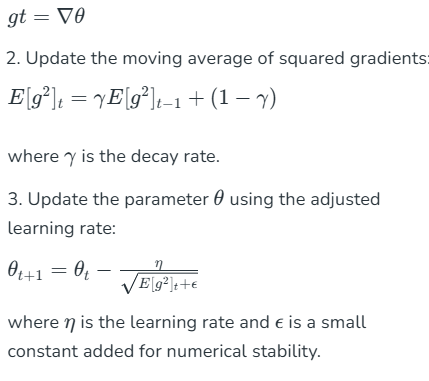

   Where:
   - eta  is the learning rate.
   - epsilon is a small constant added for numerical stability (e.g., 10^{-8} ).

## 🧩 Parameters Used in RMSProp

- **Learning Rate eta **: Controls the step size during the parameter updates. RMSProp typically uses a default learning rate of 0.001, but it can be adjusted based on the specific problem.
- **Decay Rate gamma **: Determines how quickly the moving average of squared gradients decays. A common default value is 0.9, which balances the contribution of recent and past gradients.
- **Epsilon epsilon **: A small constant added to the denominator to prevent division by zero and ensure numerical stability. A typical value for epsilon  is 10^{-8} .

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate some simple data: y = 2x + 3 + noise
torch.manual_seed(42)
X = torch.randn(100, 1)
y = 2 * X + 3 + 0.1 * torch.randn(100, 1)

# Define a simple linear regression model
model = nn.Linear(1, 1)

# Define Mean Squared Error loss
criterion = nn.MSELoss()

# Define RMSProp optimizer
optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    optimizer.zero_grad()   
    loss.backward()         
    optimizer.step()        
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}")

# Print final parameters
print("Learned parameters:")
print(f"Weight: {model.weight.item():.4f}, Bias: {model.bias.item():.4f}")


Epoch [10/100], Loss: 6.1434
Epoch [20/100], Loss: 5.3946
Epoch [30/100], Loss: 4.7611
Epoch [40/100], Loss: 4.1882
Epoch [50/100], Loss: 3.6613
Epoch [60/100], Loss: 3.1754
Epoch [70/100], Loss: 2.7288
Epoch [80/100], Loss: 2.3207
Epoch [90/100], Loss: 1.9506
Epoch [100/100], Loss: 1.6178
Learned parameters:
Weight: 1.4912, Bias: 1.8815


# 📈 Learning Rate Scheduling in Deep Learning

## 🤔 What is Learning Rate Scheduling?

Learning Rate Scheduling is a technique in deep learning where the **learning rate is adjusted dynamically** during training instead of keeping it constant. It helps the optimizer make better updates to model parameters at different stages of training.

- Early in training: Larger learning rate → faster convergence  
- Later in training: Smaller learning rate → fine-tunes weights and avoids overshooting minima  

Common types of learning rate schedules include:  
- **Step Decay**: Reduce learning rate at fixed intervals  
- **Time-Based Decay**: Gradually decreases learning rate over epochs  
- **Exponential Decay**: Reduces learning rate exponentially  
- **Reduce on Plateau**: Decreases learning rate when performance stops improving  

## ❓ Why Use Learning Rate Scheduling?

1. **Faster Convergence** 🚀  
   - Large learning rates at the start allow the model to converge quickly.  

2. **Avoid Overshooting** ⚡  
   - Reducing the learning rate later helps prevent the optimizer from bouncing around the minimum.  

3. **Improved Performance** ✅  
   - Fine-tuning with a smaller learning rate often leads to better accuracy and lower loss.  

4. **Adaptive Optimization** 🔄  
   - Helps optimizers like SGD, Adam, RMSProp perform more efficiently across different stages of training.  


## 📍 Where is Learning Rate Scheduling Used?

- **Deep Neural Networks**: CNNs, RNNs, Transformers, etc.  
- **Large-scale Training**: Training on big datasets where convergence speed matters  
- **Transfer Learning**: Fine-tuning pre-trained models often requires decreasing learning rates gradually  
- **Any Iterative Optimization**: Anytime gradient-based optimization is applied, learning rate schedules can help  


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Simple dataset: y = 2x + 3 + noise
torch.manual_seed(42)
X = torch.randn(100, 1)
y = 2 * X + 3 + 0.1 * torch.randn(100, 1)

# Define a simple linear regression model
model = nn.Linear(1, 1)

# Mean Squared Error loss
criterion = nn.MSELoss()

# SGD optimizer with initial learning rate
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Learning rate scheduler: Step Decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

# Training loop
n_epochs = 60
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Update learning rate
    scheduler.step()
    
    if (epoch+1) % 10 == 0:
        lr = scheduler.get_last_lr()[0]
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Learning Rate: {lr:.4f}")

# Print final parameters
print("Learned parameters:")
print(f"Weight: {model.weight.item():.4f}, Bias: {model.bias.item():.4f}")

Epoch [10/60], Loss: 0.1150, Learning Rate: 0.1000
Epoch [20/60], Loss: 0.0088, Learning Rate: 0.0500
Epoch [30/60], Loss: 0.0079, Learning Rate: 0.0500
Epoch [40/60], Loss: 0.0078, Learning Rate: 0.0250
Epoch [50/60], Loss: 0.0078, Learning Rate: 0.0250
Epoch [60/60], Loss: 0.0078, Learning Rate: 0.0125
Learned parameters:
Weight: 2.0007, Bias: 3.0028


Epoch 10/60 - Losses -> SGD: 0.0626, Adam: 0.0421, RMSProp: 0.0388
Epoch 20/60 - Losses -> SGD: 0.0078, Adam: 0.0078, RMSProp: 0.0079
Epoch 30/60 - Losses -> SGD: 0.0079, Adam: 0.0079, RMSProp: 0.0079
Epoch 40/60 - Losses -> SGD: 0.0078, Adam: 0.0078, RMSProp: 0.0078
Epoch 50/60 - Losses -> SGD: 0.0078, Adam: 0.0078, RMSProp: 0.0078
Epoch 60/60 - Losses -> SGD: 0.0078, Adam: 0.0078, RMSProp: 0.0078


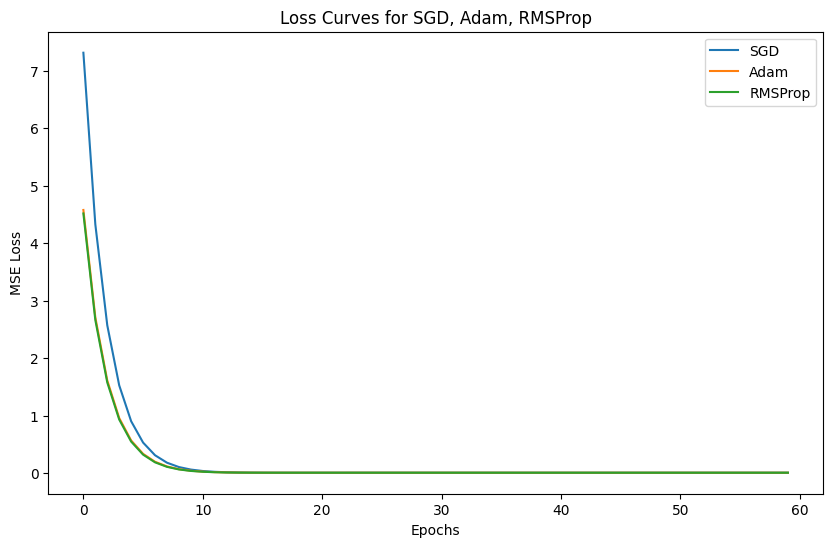

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Data
torch.manual_seed(42)
X = torch.randn(100, 1)
y = 2 * X + 3 + 0.1 * torch.randn(100, 1)

# 2. Model
model = nn.Linear(1, 1)

# 3. Loss
criterion = nn.MSELoss()

# 4. Optimizers
optimizer_sgd = optim.SGD(model.parameters(), lr=0.1)
optimizer_adam = optim.Adam(model.parameters(), lr=0.01)
optimizer_rms = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9)

# Learning rate scheduler for SGD
scheduler_sgd = optim.lr_scheduler.StepLR(optimizer_sgd, step_size=20, gamma=0.5)

# 5. Training Loop
n_epochs = 60
loss_history = {"SGD": [], "Adam": [], "RMSProp": []}

for epoch in range(n_epochs):
    # --- SGD ---
    optimizer_sgd.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer_sgd.step()
    scheduler_sgd.step()
    loss_history["SGD"].append(loss.item())
    
    # --- Adam ---
    optimizer_adam.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer_adam.step()
    loss_history["Adam"].append(loss.item())
    
    # --- RMSProp ---
    optimizer_rms.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer_rms.step()
    loss_history["RMSProp"].append(loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{n_epochs} - Losses -> SGD: {loss_history['SGD'][-1]:.4f}, Adam: {loss_history['Adam'][-1]:.4f}, RMSProp: {loss_history['RMSProp'][-1]:.4f}")

# 6. Plot Loss Curves
plt.figure(figsize=(10,6))
for key in loss_history:
    plt.plot(loss_history[key], label=key)
plt.title("Loss Curves for SGD, Adam, RMSProp")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# 📌 Code Explanation: Optimizers and Learning Rate Scheduling

- **Data Preparation**  
  - Generate synthetic data: `y = 2x + 3 + noise`  
  - `X` → inputs, `y` → targets  

- **Model**  
  - Simple linear regression: `nn.Linear(1, 1)`  
  - Learns one weight and one bias  

- **Loss Function**  
  - Mean Squared Error (MSE) using `nn.MSELoss()`  

- **Optimizers**  
  - **SGD**: `optim.SGD` with learning rate 0.1  
  - **Adam**: `optim.Adam` with learning rate 0.01  
  - **RMSProp**: `optim.RMSprop` with learning rate 0.01, decay `alpha=0.9`  

- **Learning Rate Scheduler**  
  - Step decay for SGD: halves learning rate every 20 epochs using `StepLR`  

- **Training Loop**  
  - Iterate over `n_epochs = 60`  
  - For each optimizer:  
    - Clear gradients: `optimizer.zero_grad()`  
    - Forward pass → compute predictions  
    - Compute loss  
    - Backward pass: `loss.backward()`  
    - Update weights: `optimizer.step()`  
    - Update scheduler (SGD only): `scheduler_sgd.step()`  
  - Track loss for plotting  

- **Logging**  
  - Print losses every 10 epochs for monitoring  

- **Visualization**  
  - Plot loss curves for SGD, Adam, RMSProp  
  - Compare **convergence speed and stability**


# 🌟 Transfer Learning and Fine-Tuning in NLP

## 🔹 Overview

Transfer learning is a machine learning technique where a model trained on one task is reused as the starting point for a model on a second task. This approach is especially useful in areas with limited labeled data, allowing knowledge to be transferred from a domain with abundant data to a domain with scarce data.  

Fine-tuning is a specific type of transfer learning where some or all layers of a pre-trained model are further trained on new data for the target task. This helps the model adapt to the nuances of the new dataset, improving performance. 

## 🔹 Key Concepts

- **🔄 Transfer Learning**: Using a pre-trained model’s features as fixed representations and training only the final layers on new data. Useful for quick adaptation when new data is limited.  

- **✏️ Fine-Tuning**: Retraining some or all of the pre-trained model’s layers on the new dataset. Helps the model better adapt to specific tasks but requires more data and computation.  

## 🔹 Practical Application: Fine-Tuning BERT for Sentiment Analysis

The article demonstrates how to fine-tune a pre-trained BERT model for binary sentiment classification using Hugging Face's `transformers` library. Key steps include:

1. **📦 Installing and Importing Libraries**: Import `torch`, `transformers`, `AdamW`, etc.
2. **🤖 Loading Pre-Trained BERT Model and Tokenizer**: Use `BertTokenizer` and `BertForSequenceClassification`.
3. **📝 Preparing the Training Dataset**: Create labeled sentiment data.
4. **🔢 Tokenizing the Data**: Convert text into tokens that BERT can process.
5. **📚 Creating DataLoader**: Batch and shuffle data for training.
6. **⚙️ Setting Up the Optimizer**: Initialize AdamW optimizer.
7. **🏋️ Training the Model**: Train the model on the dataset.
8. **📊 Evaluating the Model**: Check performance on a test dataset.

## 🔹 Conclusion

Fine-tuning pre-trained models like BERT allows for **efficient adaptation** to specific NLP tasks, saving computational resources and improving accuracy.  This is particularly valuable when labeled data is limited.  

In [12]:
# Step 1: Install libraries
!pip install transformers torch

# Fine-Tuning ResNet18 for a 2-Class Classification Task

This  demonstrates the process of fine-tuning a **pretrained ResNet18** model for a simple 2-class classification task using PyTorch. A fake dataset is used for demonstration purposes.

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

## 1️ Load a Pretrained ResNet18

ResNet18 pretrained on ImageNet is loaded. Using a pretrained model leverages previously learned features, such as edges, textures, and shapes, without training the entire network from scratch. This is a key concept in **transfer learning**.

In [14]:
resnet_model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

## 2️ Freeze All Layers Except the Classifier

Pretrained convolutional layers are frozen to prevent their learned features from being modified during training. The final fully connected (fc) layer is replaced to match the task, requiring **2 output classes** instead of 1000. Only the new fc layer is trained.


In [15]:
for param in resnet_model.parameters():
    param.requires_grad = False
    
# Replace the last fully connected layer for 2-class classification
num_features = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_features, 2)

## 3️ Prepare Dataset and DataLoader

Images are preprocessed using transforms: resizing to 224x224 pixels and converting to tensors. For demonstration, a **FakeData** dataset generates synthetic images and labels. The DataLoader handles batching and shuffling of the data, making training efficient.


In [16]:
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
# Using FakeData for demonstration
fake_train_dataset = datasets.FakeData(transform=image_transforms, size=120, num_classes=2)
train_loader = DataLoader(fake_train_dataset, batch_size=10, shuffle=True)

## 4️ Define Loss Function and Optimizer

The **CrossEntropyLoss** is used as the loss function, suitable for multi-class classification tasks. The **Adam optimizer** updates the weights of the final fc layer. Since other layers are frozen, only the classifier’s parameters are updated.

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.fc.parameters(), lr=0.001)

## 5️ Training Loop

The model is set to training mode using `model.train()`. For each epoch, the following steps occur:

- Loop over batches of images and labels.
- Reset gradients with `optimizer.zero_grad()`.
- Perform a forward pass to compute predictions.
- Compute the loss between predictions and true labels.
- Backpropagate the loss using `loss.backward()`.
- Update the classifier weights with `optimizer.step()`.

In [18]:
resnet_model.train()
epochs = 4  # Slightly different number of epochs

for epoch in range(epochs):
    for batch_images, batch_labels in train_loader:
        optimizer.zero_grad()                  # Reset gradients
        predictions = resnet_model(batch_images)  # Forward pass
        loss = loss_fn(predictions, batch_labels) # Compute loss
        loss.backward()                        # Backpropagate
        optimizer.step()                       # Update weights

    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")

Epoch 1/4 - Loss: 0.7473
Epoch 2/4 - Loss: 0.5659
Epoch 3/4 - Loss: 0.5679
Epoch 4/4 - Loss: 0.5970


# ️6 Training Complete

After training, the fc layer is ready to classify images into two classes. Pretrained convolutional layers continue to provide **powerful feature extraction**, while the new classifier adapts these features to the specific task.  

This demonstrates a practical example of **transfer learning** and **fine-tuning** for image classification.

In [19]:
print("✅ Fine-tuning finished! The final layer is trained for your 2-class task.")

✅ Fine-tuning finished! The final layer is trained for your 2-class task.


# Fine-Tuning ResNet18 on a Custom Image Dataset

This notebook demonstrates fine-tuning a **pretrained ResNet18** model using a custom image dataset stored in folders. The process uses PyTorch and covers loading the model, preparing the dataset, training, and monitoring results.

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## 1️⃣ Load Pretrained ResNet18

- The ResNet18 model is loaded with **pretrained weights** from ImageNet.  
- Pretrained layers are **frozen** to prevent updating during training. This keeps the learned features intact.  
- The final fully connected layer (classifier) is replaced to output **2 classes**, suitable for the custom dataset.  
- The model is moved to the **available device** (CPU or GPU) for training.

In [21]:
# 1️ Load Pretrained ResNet18
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Freeze pretrained layers
for param in resnet.parameters():
    param.requires_grad = False

# Replace classifier for 2 classes
num_features = resnet.fc.in_features
resnet.fc = nn.Linear(num_features, 2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 2️⃣ Prepare Dataset from Folder

- Images are preprocessed using transforms:
  - Resizing to **224x224 pixels**.
  - Conversion to **tensor format**.
  - Normalization using ImageNet mean and standard deviation.  
- `ImageFolder` reads images from a folder structure where each subfolder corresponds to a class.  
- A **DataLoader** is created to batch and shuffle images during training.

In [22]:
# 2️ Prepare Dataset from Folder
img_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset_path = "images"  # Replace with your folder
dataset = datasets.ImageFolder(root=dataset_path, transform=img_transforms)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

## 3️⃣ Display a Few Images

- A loop iterates through the dataset to display sample images.  
- Images are **unnormalized** for correct display.  
- The class labels are retrieved from the folder names.  
- This step ensures the dataset is loaded correctly and classes are properly labeled.

Dataset has 4 images.


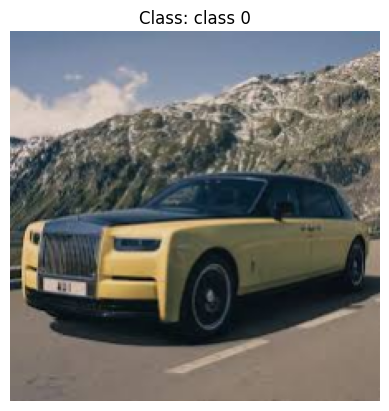

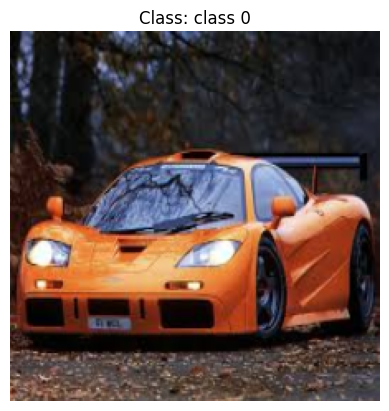

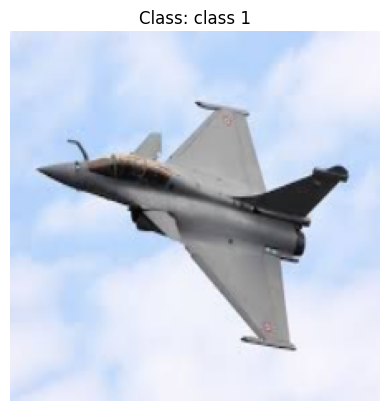

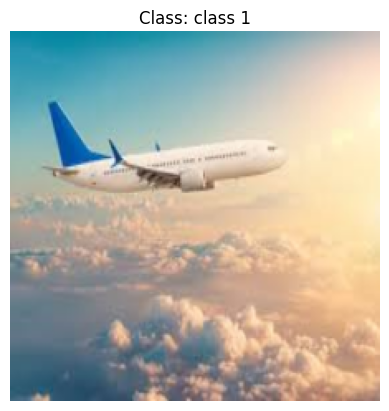

In [23]:
# 3️ Display a few images
print(f"Dataset has {len(dataset)} images.")
for idx in range(len(dataset)):
    img, lbl = dataset[idx]
    img_disp = img.permute(1, 2, 0)  # C,H,W -> H,W,C
    img_disp = img_disp * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img_disp = torch.clamp(img_disp, 0, 1)
    plt.imshow(img_disp)
    plt.title(f"Class: {dataset.classes[lbl]}")
    plt.axis("off")
    plt.show()

## 4️⃣ Define Loss and Optimizer

- **Loss function**: `CrossEntropyLoss` is used for multi-class classification.  
- **Optimizer**: `Adam` updates the weights of the final fully connected layer during training.  
- Only the classifier parameters are updated since the pretrained layers are frozen.

In [24]:
loss_func = nn.CrossEntropyLoss()
opt = optim.Adam(resnet.fc.parameters(), lr=0.001)

## 5️⃣ Training Loop

- The model is set to **training mode**.  
- For each epoch:
  - Iterate over batches of images and labels.
  - Move data to the selected device (CPU/GPU).
  - Reset gradients at the start of each batch.
  - Compute predictions with a **forward pass**.
  - Compute loss between predictions and true labels.
  - Backpropagate the loss and update the classifier weights.
- The **loss value** is printed after each epoch to monitor progress.

In [25]:
epochs = 3
resnet.train()

for epoch in range(epochs):
    for batch_imgs, batch_labels in loader:
        batch_imgs, batch_labels = batch_imgs.to(device), batch_labels.to(device)

        opt.zero_grad()
        outputs = resnet(batch_imgs)
        loss = loss_func(outputs, batch_labels)
        loss.backward()
        opt.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/3, Loss: 0.6138
Epoch 2/3, Loss: 0.4540
Epoch 3/3, Loss: 0.3596


## 6️⃣ Training Complete

- After training, the classifier is ready to predict classes for new images.  
- Pretrained convolutional layers continue to provide strong **feature extraction**.  
- Fine-tuning only the final layer reduces training time and prevents overfitting on small datasets.

In [26]:
print("✅ Fine-tuning finished! Classifier is ready for your dataset.")

✅ Fine-tuning finished! Classifier is ready for your dataset.


# 📘 Handling Class Imbalance in PyTorch

Class imbalance is a common issue in machine learning, where certain classes are underrepresented compared to others. This imbalance can lead to biased models that perform poorly on minority classes. In this notebook, we'll explore various techniques to handle class imbalance in PyTorch, ensuring your models are robust and generalize well across all classes.

## 🔍 Understanding Class Imbalance

Class imbalance occurs when the distribution of classes in a dataset is uneven. For instance, in a binary classification problem, if 90% of the samples belong to class A and only 10% belong to class B, the model may become biased towards class A. This bias can result in poor performance on class B, which is often more critical in real-world applications.

## 🛠️ Techniques to Handle Class Imbalance

### 1. Resampling Techniques

Resampling involves modifying the dataset to balance the class distribution.

#### a. Oversampling

Oversampling increases the number of samples in the minority class by duplicating existing samples or generating new ones through data augmentation.

#### b. Undersampling

Undersampling reduces the number of samples in the majority class to balance the dataset.

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import numpy as np

# -------------------------------
# 1️ Create an imbalanced dataset
# -------------------------------
data = torch.randn(100, 5)
targets = torch.cat((torch.zeros(90), torch.ones(10)))  # 90:10 imbalance

dataset = TensorDataset(data, targets)

# -------------------------------
# 2️ Weighted Random Sampler
# -------------------------------
class_sample_count = np.array([len(np.where(targets.numpy() == t)[0]) for t in np.unique(targets.numpy())])
weights = 1. / class_sample_count
samples_weights = np.array([weights[int(t)] for t in targets.numpy()])
samples_weights = torch.from_numpy(samples_weights)
sampler = WeightedRandomSampler(samples_weights, len(samples_weights))

loader = DataLoader(dataset, batch_size=8, sampler=sampler)

# -------------------------------
# 3️ Simple Model
# -------------------------------
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(5, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNet().to(device)

# -------------------------------
# 4️ Class weights for loss (corrected)
# -------------------------------
class_counts = np.array([len(np.where(targets.numpy() == t)[0]) for t in np.unique(targets.numpy())])
class_weights = 1. / class_counts
weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
loss_fn = nn.CrossEntropyLoss(weight=weights_tensor.to(device))

# -------------------------------
# 5️ Optimizer
# -------------------------------
optimizer = optim.Adam(model.parameters(), lr=0.01)

# -------------------------------
# 6️ Training Loop
# -------------------------------
for epoch in range(3):
    for batch_data, batch_labels in loader:
        batch_data, batch_labels = batch_data.to(device), batch_labels.to(device).long()
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = loss_fn(outputs, batch_labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

print("Training done! ✅ Class imbalance handled correctly.")

Epoch 1, Loss: 0.4366
Epoch 2, Loss: 0.2275
Epoch 3, Loss: 0.2738
Training done! ✅ Class imbalance handled correctly.


# Handling Class Imbalance in PyTorch

This notebook demonstrates how to handle **class imbalance** in a dataset using PyTorch. Class imbalance occurs when some classes have significantly more samples than others, which can cause the model to be biased towards the majority class.  


## 1️ Create an Imbalanced Dataset

An artificial dataset is created with **100 samples** and **2 classes**, where class 0 has 90 samples and class 1 has 10 samples. This simulates a **90:10 imbalance**, which is common in real-world datasets like fraud detection or medical diagnosis.


## 2️ Weighted Random Sampler

A **WeightedRandomSampler** is used to handle imbalance.  

- Each class is assigned a weight **inversely proportional to its frequency**.  
- Minority class samples receive higher weights, making them more likely to be selected during training.  
- The sampler ensures that each batch has a more balanced representation of all classes, improving model learning.


## 3️ Simple Neural Network Model

A **simple feedforward neural network** is defined with:

- An input layer corresponding to the feature size.
- One hidden layer with ReLU activation.
- An output layer with 2 neurons (for 2 classes).

This small network is used to demonstrate training on the imbalanced dataset.


## 4️ Class Weights for Loss Function

Class weights are computed and provided to the **CrossEntropyLoss** function:

- The weight for each class is the inverse of its frequency.
- This ensures that **errors on minority class samples contribute more** to the loss, helping the model learn minority class patterns effectively.


## 5️ Optimizer

The **Adam optimizer** is used to update the model weights. It is applied to all parameters of the network and adapts learning rates during training, which helps with faster convergence.


## 6️ Training Loop

The training process involves:

- Iterating over batches sampled by the **WeightedRandomSampler**.
- Moving data to the appropriate device (CPU/GPU).
- Resetting gradients at the start of each batch.
- Forward pass to compute predictions.
- Calculating loss using the **class-weighted CrossEntropyLoss**.
- Backpropagation and updating weights using the optimizer.
- Printing the loss after each epoch to monitor progress.

This loop ensures that the model sees a **balanced representation of classes** and learns effectively despite the imbalance.


## 7️ Training Complete

After training:

- The model is capable of handling class imbalance.
- Minority class samples have been properly weighted in both **sampling** and **loss calculation**.
- This approach prevents the model from being biased towards the majority class, leading to more accurate predictions across all classes.


###  Key Takeaways

- **Class Imbalance** can severely affect model performance if not handled.  
- **WeightedRandomSampler** balances batches by oversampling minority classes.  
- **Class-weighted loss** gives more importance to minority class errors.  
- Combining sampler and loss weighting helps in learning **robust models** on imbalanced datasets.